In [1]:
import pandas as pd
import requests

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-08-22 10:36:55.322112')

In [4]:
btc = get_historic_price('btc','bitstamp',after=last_week)

In [5]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-08-22 11:00:00,11592.00,11600.98,11562.04,11572.27,146.107352,1.692255e+06
2020-08-22 12:00:00,11572.27,11577.03,11550.13,11563.82,108.298799,1.251841e+06
2020-08-22 13:00:00,11565.90,11613.02,11565.90,11590.05,95.544319,1.107501e+06
2020-08-22 14:00:00,11589.58,11603.19,11563.65,11603.19,73.849287,8.551846e+05
2020-08-22 15:00:00,11598.67,11645.00,11572.65,11622.05,111.930393,1.298971e+06


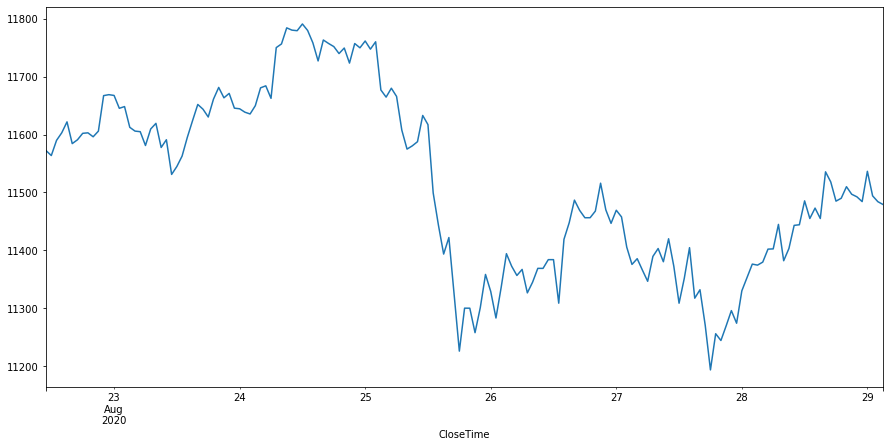

In [7]:
btc['ClosePrice'].plot(figsize=(15, 7))

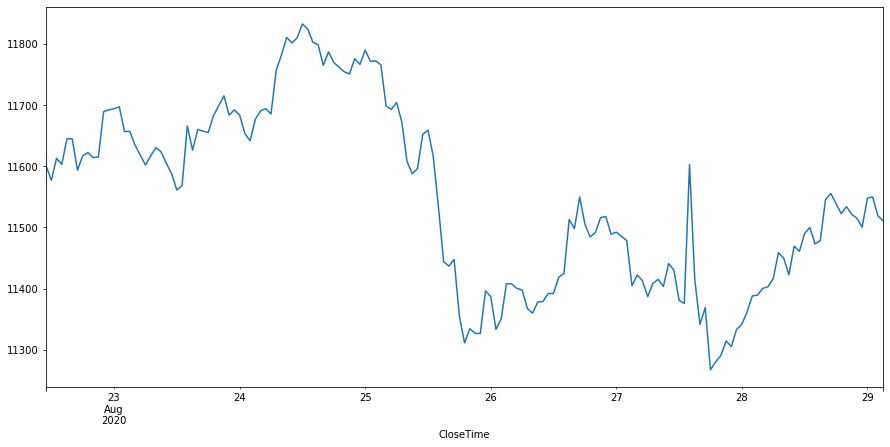

In [8]:
btc['HighPrice'].plot(figsize=(15,7))

In [ ]:
eth = get_historic_price('eth','bitstamp',after=last_week)

In [10]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-08-19 11:00:00,413.75,413.77,408.74,412.46,1736.248353,713908.372726
2020-08-19 12:00:00,412.70,416.02,410.89,413.41,1431.015731,592424.298952
2020-08-19 13:00:00,413.48,414.44,411.32,412.76,903.846138,373148.117489
2020-08-19 14:00:00,412.71,415.50,410.06,412.69,2288.806140,944591.800503
2020-08-19 15:00:00,412.68,414.49,407.72,409.32,1653.371996,680686.522937
